In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import torch as pt

from tools import Curve

In [2]:
def extend_curve(points):
    new_points = np.stack([
        points[-1],
        (2*points[-1]) - points[-2],
        *[np.random.uniform(size=points.shape[1]) for _ in range(len(points) - 2)],
    ])
    return new_points

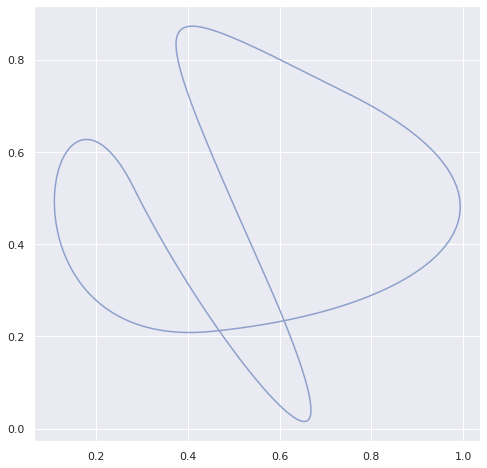

In [51]:
points = [np.random.uniform(size=(4, 2))]
for i in range(1, 3):
    points.append(extend_curve(points[-1]))
    
final_points = extend_curve(points[-1])
final_points[-2] = (2*points[0][0]) - points[0][1]
final_points[-1] = points[0][0]
points.append(final_points)
    
_, ax = plt.subplots(figsize=(8,8))
for point_set in points:
    x, y = Curve(point_set).build_curve()
    sns.lineplot(x=x, y=y, color='#8da0cb', sort=False, ax=ax)